<a href="https://colab.research.google.com/github/SowmyaMadala/dreamdig/blob/master/Mini2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Modules for Preprocessing

In [2]:
import cv2                       #for converting to gray scale
import matplotlib.pyplot as plt  #for plotting the images
import os                        #for reading the images
from PIL import Image            #for reshaping the masked image
import numpy as np               #To work on images in binary format
import pandas as pd
import sys
import imutils
from imutils import paths       #To read the path of the images

Reading the input images

In [4]:
os.chdir('/content/drive/MyDrive/Imageswithmask/Images')
#imglst   = os.listdir('/content/drive/MyDrive/Imageswithmask/Images')
imglst = ['A1.tif','A2.tif','A3.tif','A4.tif','A5.tif','A6.tif','A7.tif','A8.tif','A9.tif','A10.tif','A11.tif','A21.tif','A22.tif','A23.tif','A24.tif','A25.tif','A26.tif','A27.tif','A28.tif','A29.tif','A30.tif','A40.tif','A41.tif','A42.tif','A43.tif','A44.tif','A45.tif','A46.tif','A47.tif','A48.tif','A51.tif','A52.tif','A53.tif']
#imglst=['A2.tif','A3.tif','A4.tif','A5.tif','A6.tif','A7.tif','A8.tif','A23.tif','A24.tif','A25.tif','A26.tif','A27.tif','A28.tif','A40.tif','A41.tif','A42.tif','A43.tif','A44.tif']
print(imglst)
os.chdir('/content/drive/MyDrive/Imageswithmask/Masks')
masklst   = os.listdir('/content/drive/MyDrive/Imageswithmask/Masks')
print(masklst)

['A1.tif', 'A2.tif', 'A3.tif', 'A4.tif', 'A5.tif', 'A6.tif', 'A7.tif', 'A8.tif', 'A9.tif', 'A10.tif', 'A11.tif', 'A21.tif', 'A22.tif', 'A23.tif', 'A24.tif', 'A25.tif', 'A26.tif', 'A27.tif', 'A28.tif', 'A29.tif', 'A30.tif', 'A40.tif', 'A41.tif', 'A42.tif', 'A43.tif', 'A44.tif', 'A45.tif', 'A46.tif', 'A47.tif', 'A48.tif', 'A51.tif', 'A52.tif', 'A53.tif']
['A1.tif', 'A2.tif', 'A3.tif', 'A4.tif', 'A5.tif', 'A6.tif', 'A7.tif', 'A8.tif', 'A9.tif', 'A10.tif', 'A11.tif', 'A12.tif', 'A13.tif', 'A14.tif', 'A15.tif', 'A16.tif', 'A17.tif', 'A18.tif', 'A19.tif', 'A20.tif', 'A21.tif', 'A22.tif', 'A23.tif', 'A24.tif', 'A25.tif', 'A26.tif', 'A27.tif', 'A28.tif', 'A29.tif', 'A30.tif', 'A31.tif', 'A32.tif', 'A33.tif', 'A34.tif', 'A41.tif', 'A42.tif', 'A43.tif', 'A44.tif', 'A45.tif', 'A35.tif', 'A36.tif', 'A37.tif', 'A38.tif', 'A39.tif', 'A40.tif', 'A47.tif', 'A48.tif', 'A49.tif', 'A50.tif', 'A51.tif', 'A52.tif', 'A53.tif', 'A46.tif']


In [5]:
mask = []
img = []
for filename in imglst:
   img.append(filename)
for filename in masklst:
   mask.append(filename)

img.sort()
mask.sort()
len(img)
print(img)

['A1.tif', 'A10.tif', 'A11.tif', 'A2.tif', 'A21.tif', 'A22.tif', 'A23.tif', 'A24.tif', 'A25.tif', 'A26.tif', 'A27.tif', 'A28.tif', 'A29.tif', 'A3.tif', 'A30.tif', 'A4.tif', 'A40.tif', 'A41.tif', 'A42.tif', 'A43.tif', 'A44.tif', 'A45.tif', 'A46.tif', 'A47.tif', 'A48.tif', 'A5.tif', 'A51.tif', 'A52.tif', 'A53.tif', 'A6.tif', 'A7.tif', 'A8.tif', 'A9.tif']


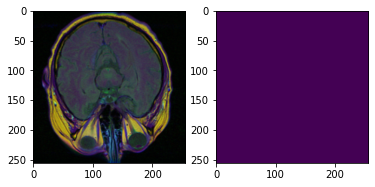

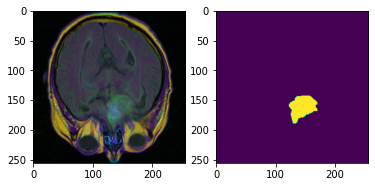

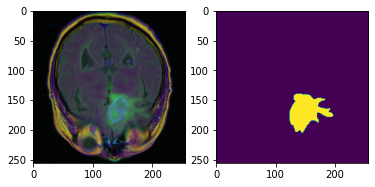

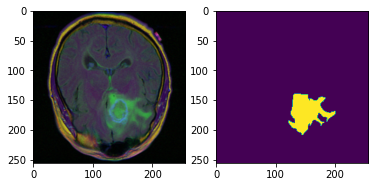

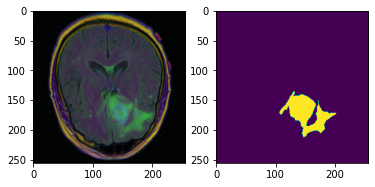

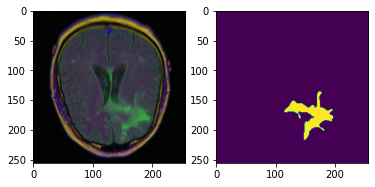

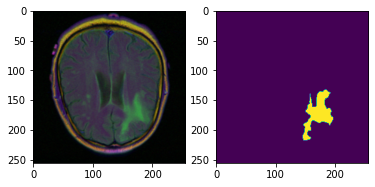

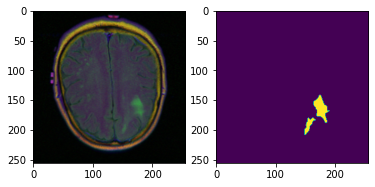

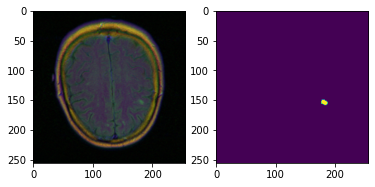

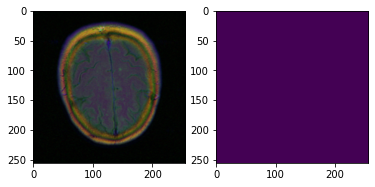

In [6]:
TRAIN_PATH='/content/drive/MyDrive/Imageswithmask/'
for n, id_ in enumerate(imglst[:10]):
    path = TRAIN_PATH
    img = plt.imread(path + 'Images/' + id_ )[:,:,:3]
    img1 = plt.imread(path + 'Masks/' + id_ )
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(np.rot90(img,2))
    f.add_subplot(1,2, 2)
    plt.imshow(np.rot90(img1,2))
    plt.show(block=True)

In [ ]:
def crop_counter_brain_img(image,plot=False):
  grayscale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  grayscale=cv2.GaussianBlur(grayscale,(5,5),0)
  threshold_image=cv2.threshold(grayscale,45,255,cv2.THRESH_BINARY)[1]
  threshold_image=cv2.erode(threshold_image,None,iterations=2)
  threshold_image=cv2.dilate(threshold_image,None,iterations=2)
  
  contour=cv2.findContours(threshold_image.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  contour=imutils.grab_contours(contour)
  c=max(contour,key=cv2.contourArea)
  
  extreme_pnts_left=tuple(c[c[:,:,0].argmin()][0])
  extreme_pnts_right=tuple(c[c[:,:,0].argmax()][0])
  extreme_pnts_top=tuple(c[c[:,:,1].argmin()][0])
  extreme_pnts_bottom=tuple(c[c[:,:,1].argmax()][0])

  new_image=image[extreme_pnts_top[1]:extreme_pnts_bottom[1],extreme_pnts_left[0]:extreme_pnts_right[0]]
  return new_image

In [7]:
from tqdm import tqdm
from skimage.transform import resize
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
print('Getting and resizing training images ... ')
X_train = np.zeros((len(imglst), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(imglst), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
        
# Re-sizing our training images to 128 x 128
      
# Using TQDM allows to create progress bars
sys.stdout.flush()

for n, id_ in tqdm(enumerate(imglst), total=len(imglst)):
    path = TRAIN_PATH
    img = plt.imread(path + 'Images/' + id_ )[:,:,:IMG_CHANNELS]
    #img = crop_counter_brain_img(img)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = plt.imread(path + 'Masks/' + id_)
    #reshaping the 2d image to 3d image
    mask = np.resize(mask, (256, 256, 1))
    mask=resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_train[n] = mask

print('Done')

Getting and resizing training images ... 


100%|██████████| 33/33 [00:23<00:00,  1.38it/s]

Done


In [8]:
import sys
import random
import warnings 
import pandas as pd
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.morphology import label
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf

In [11]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

# Note our output is effectively a mask of 128 x 128 
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [18]:
tf.compat.v1.disable_eager_execution()

# Fit our model 
results = model.fit(X_train, Y_train,
                    batch_size=16, epochs=10)

Train on 33 samples
Epoch 1/10
33/33 [==============================] - 0s 13ms/sample - loss: 0.1736 - accuracy: 0.9628
Epoch 2/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.1587 - accuracy: 0.9627
Epoch 3/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.1581 - accuracy: 0.9599
Epoch 4/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.1324 - accuracy: 0.9629
Epoch 5/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.1154 - accuracy: 0.9638
Epoch 6/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.0953 - accuracy: 0.9641
Epoch 7/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.0767 - accuracy: 0.9723
Epoch 8/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.0588 - accuracy: 0.9781
Epoch 9/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.0475 - accuracy: 0.9831
Epoch 10/10
33/33 [==============================] - 0s 5ms/sample - loss: 0.06

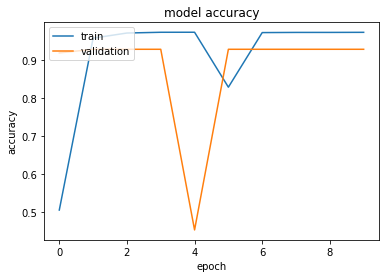

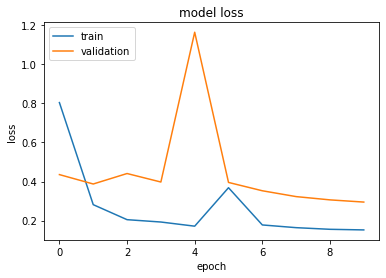

In [13]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
    
# "Loss"
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
# the first 70% was used for training
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.7)], verbose=1)


#preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [19]:
pred_sample=model.predict(X_train,verbose=1)

13


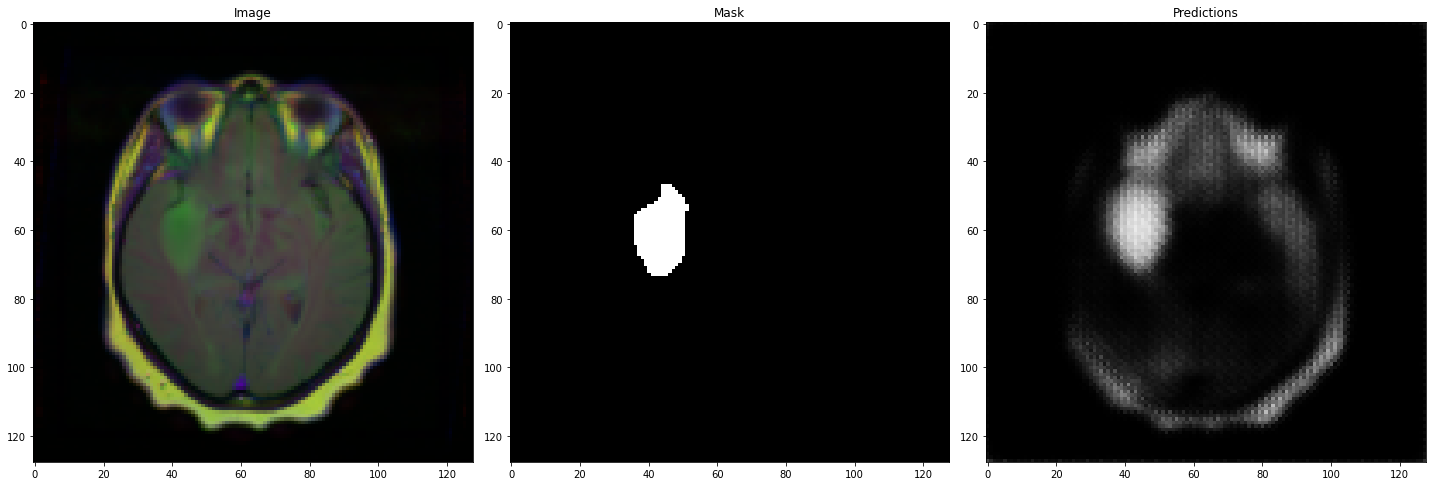

In [20]:
# Ploting our predicted masks
ix = random.randint(0, 14)
print(ix)
plt.figure(figsize=(20,20))

# Our original training image
plt.subplot(131)
imshow(X_train[ix])
plt.title("Image")

# Our original combined mask  
plt.subplot(132)
imshow(np.squeeze(Y_train[ix]))
plt.title("Mask")

# The mask our U-Net model predicts
plt.subplot(133)
imshow(np.squeeze(pred_sample[ix]))
plt.title("Predictions")
plt.show()

0


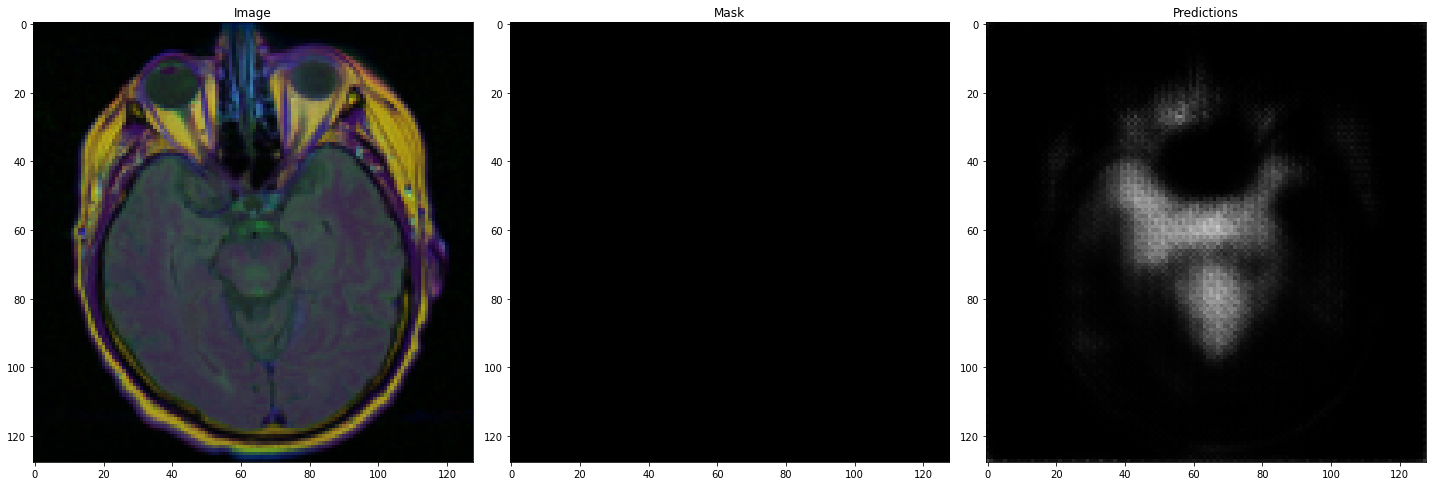

1


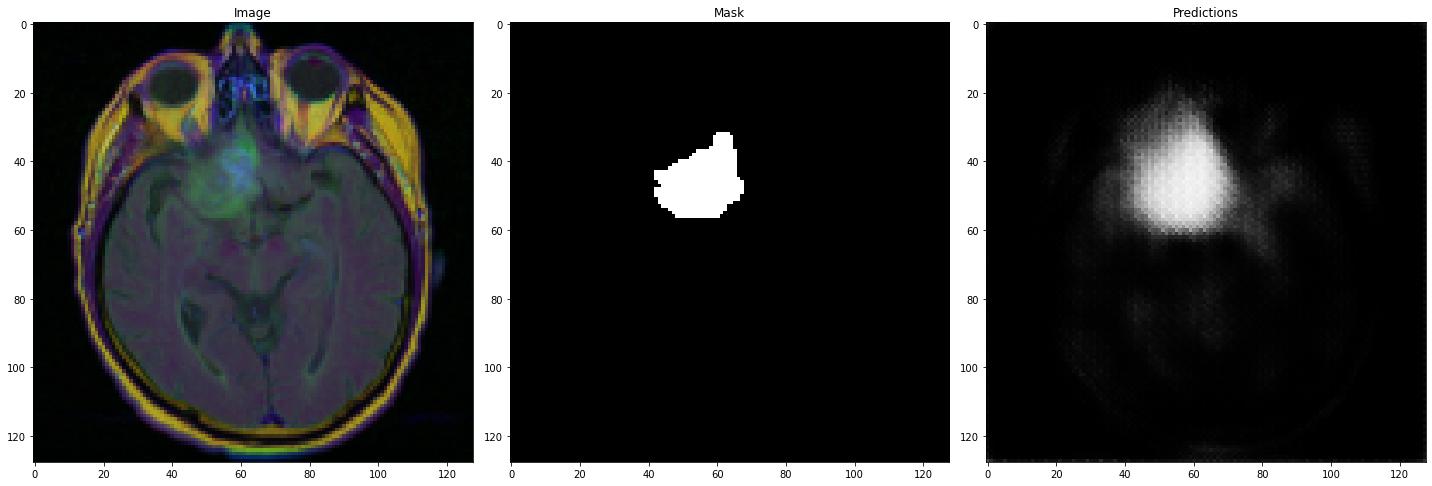

2


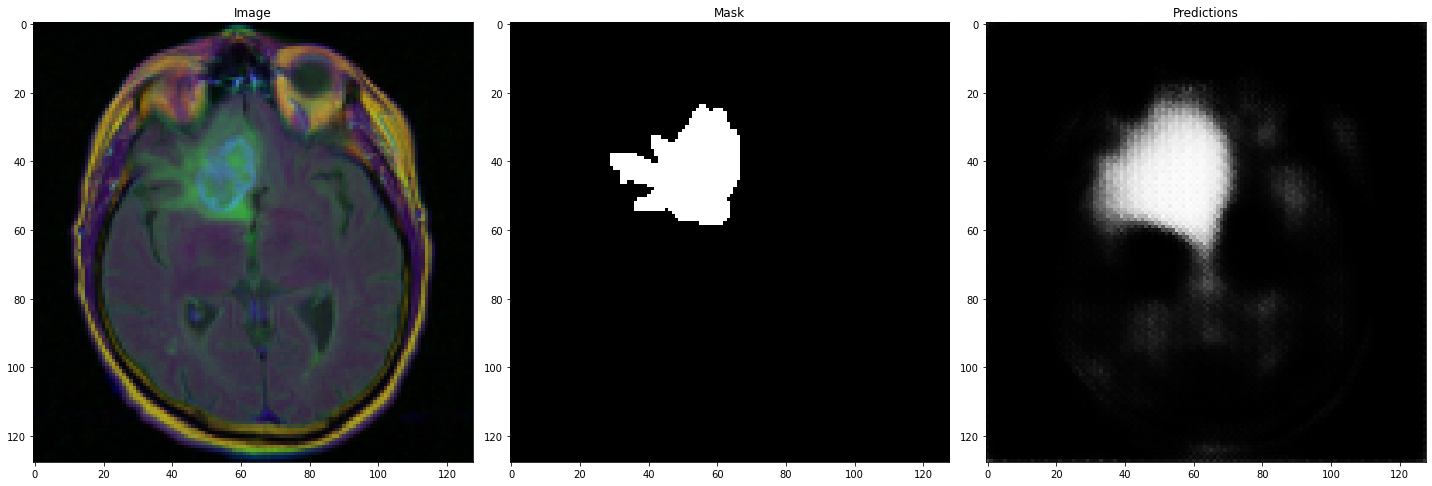

3


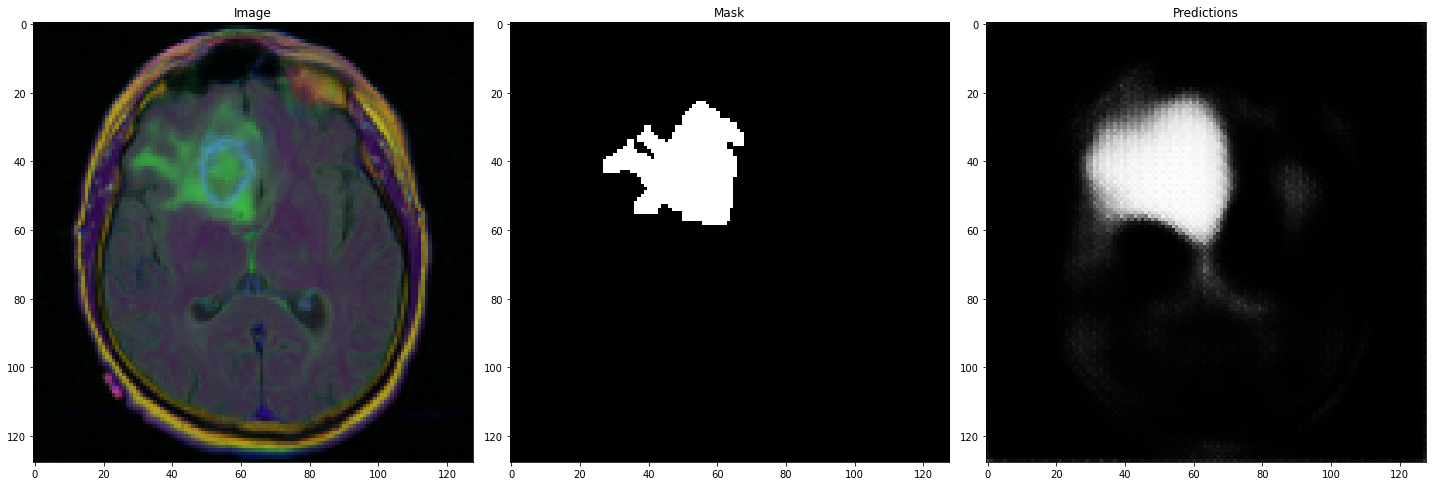

4


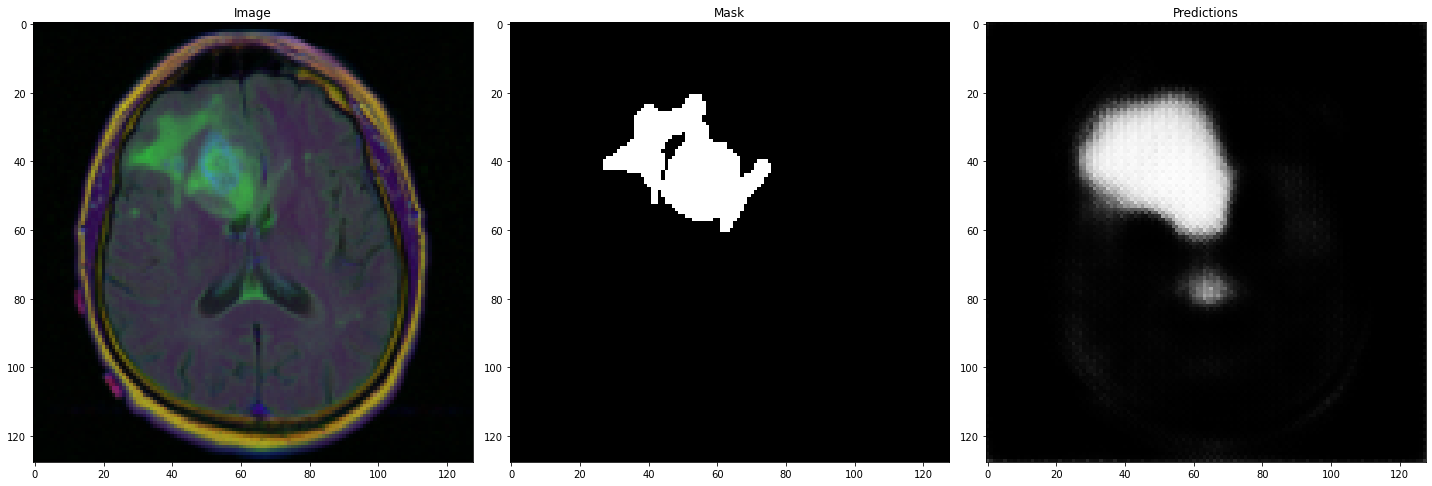

5


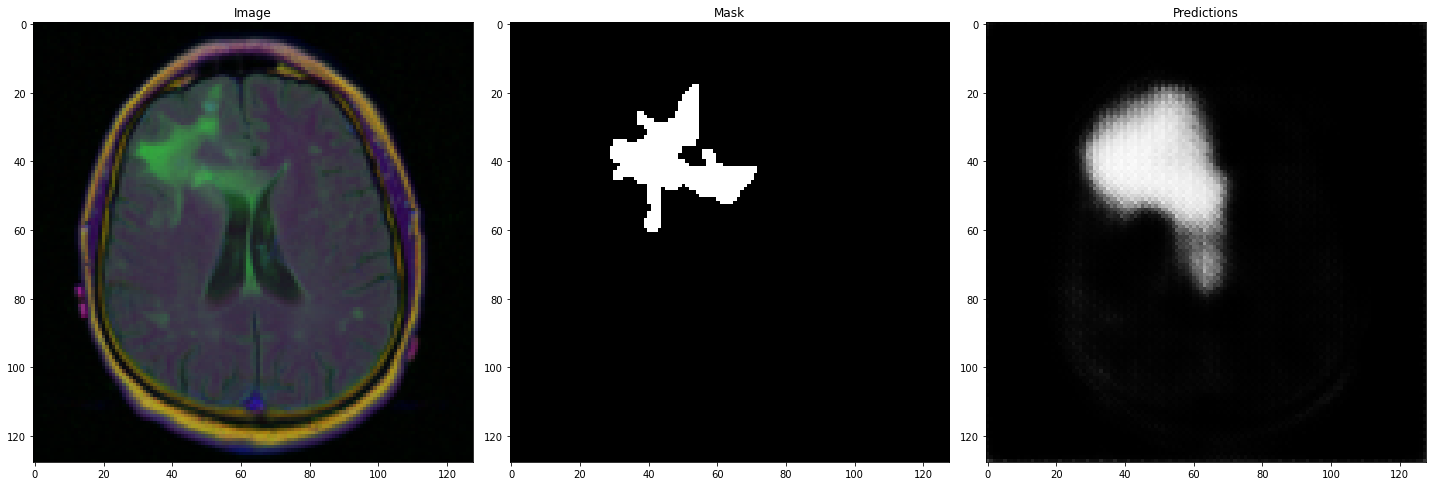

6


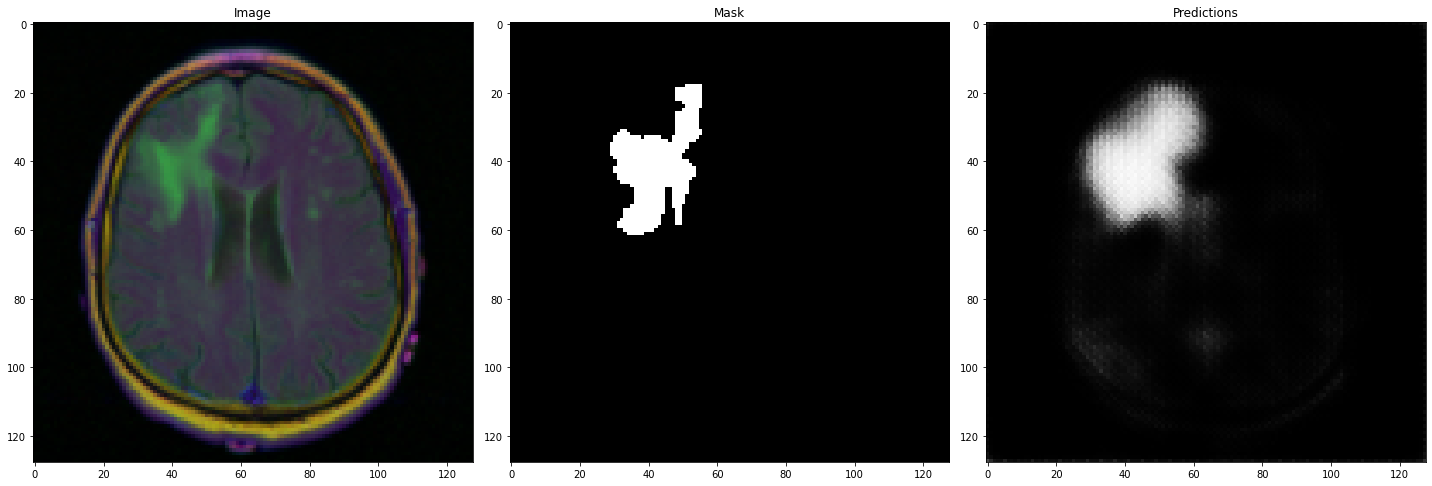

7


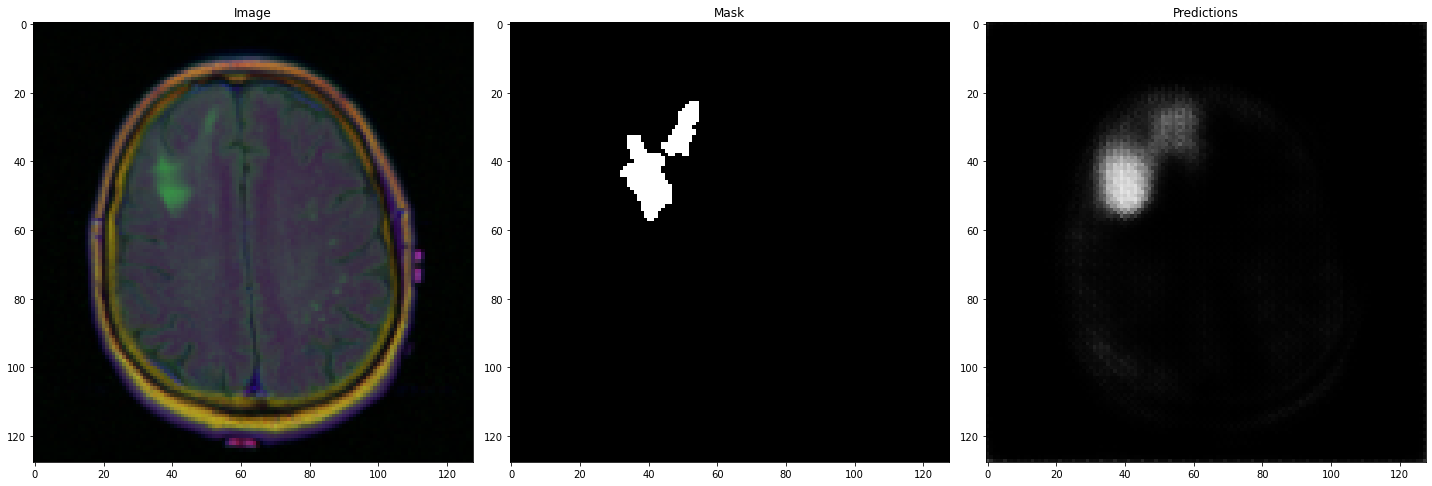

8


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


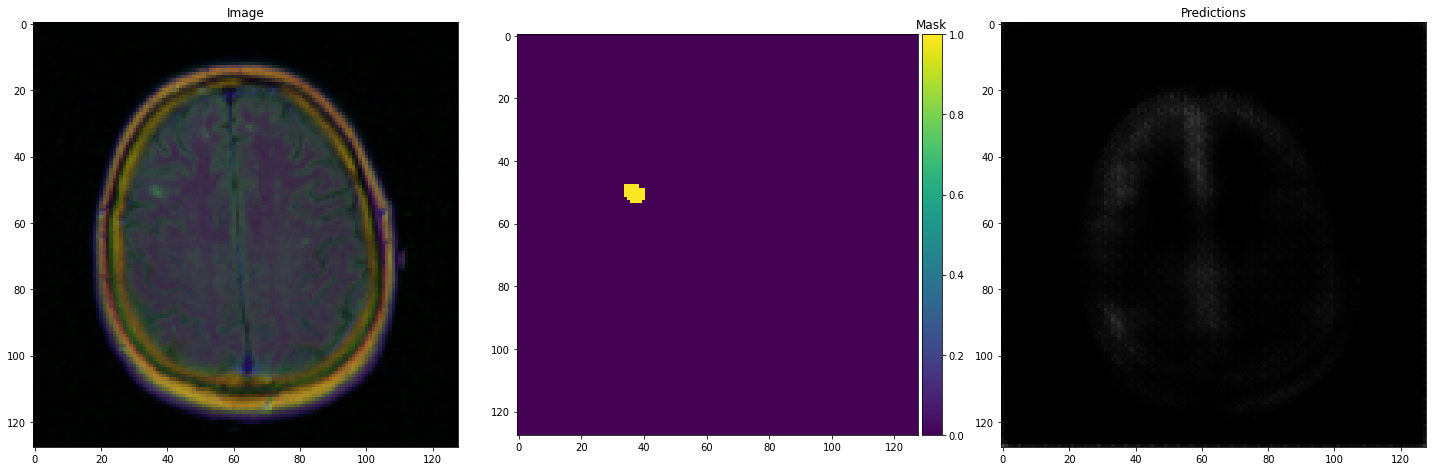

9


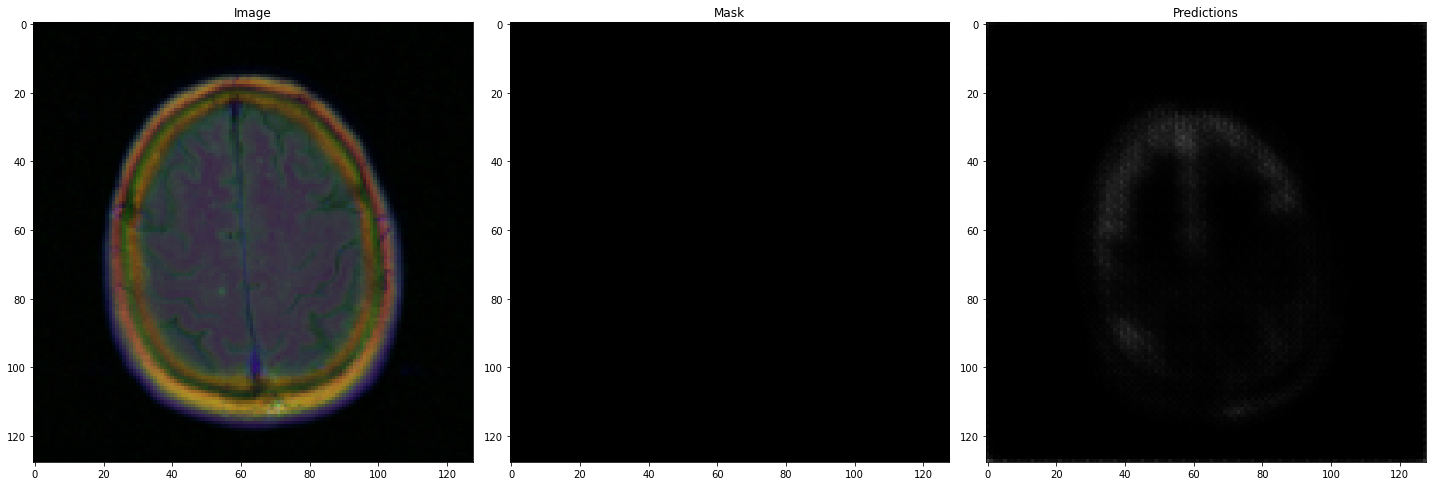

10


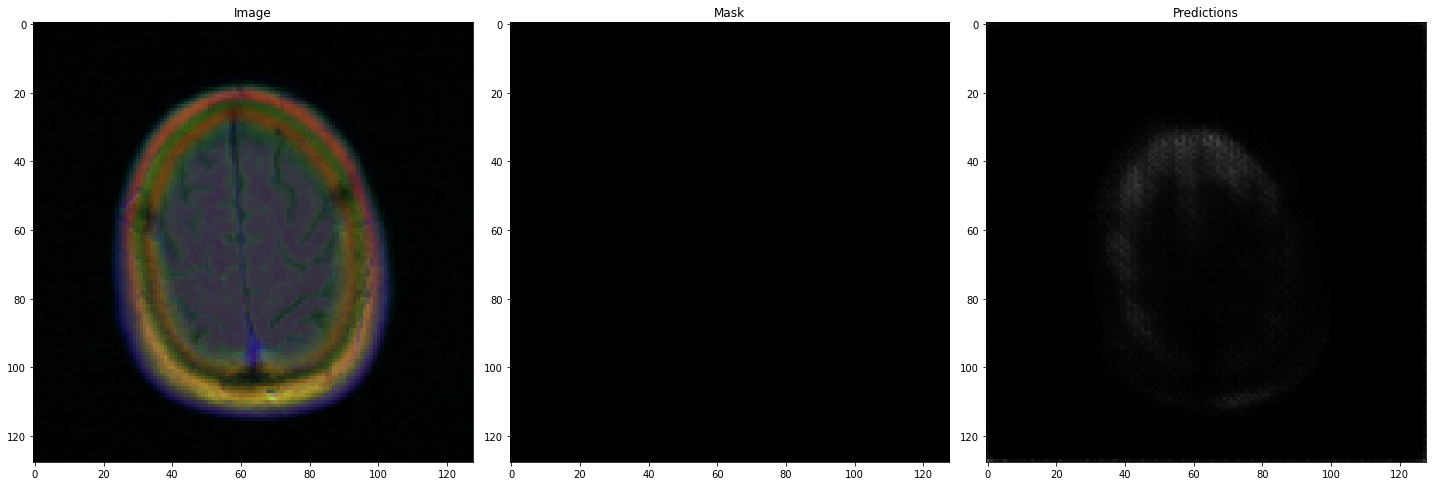

11


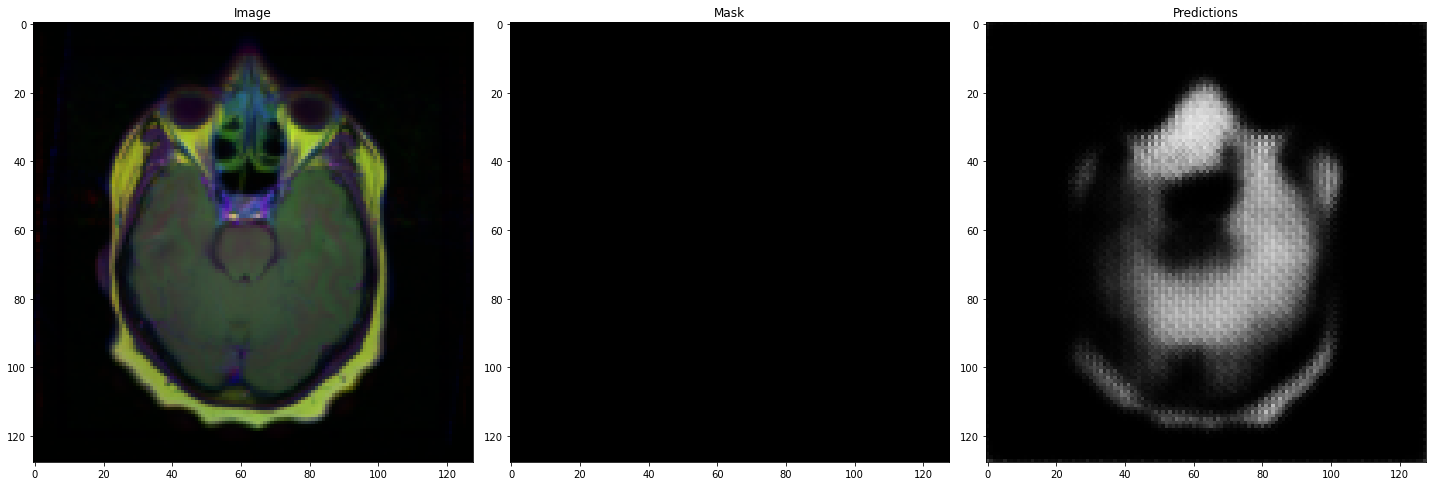

12


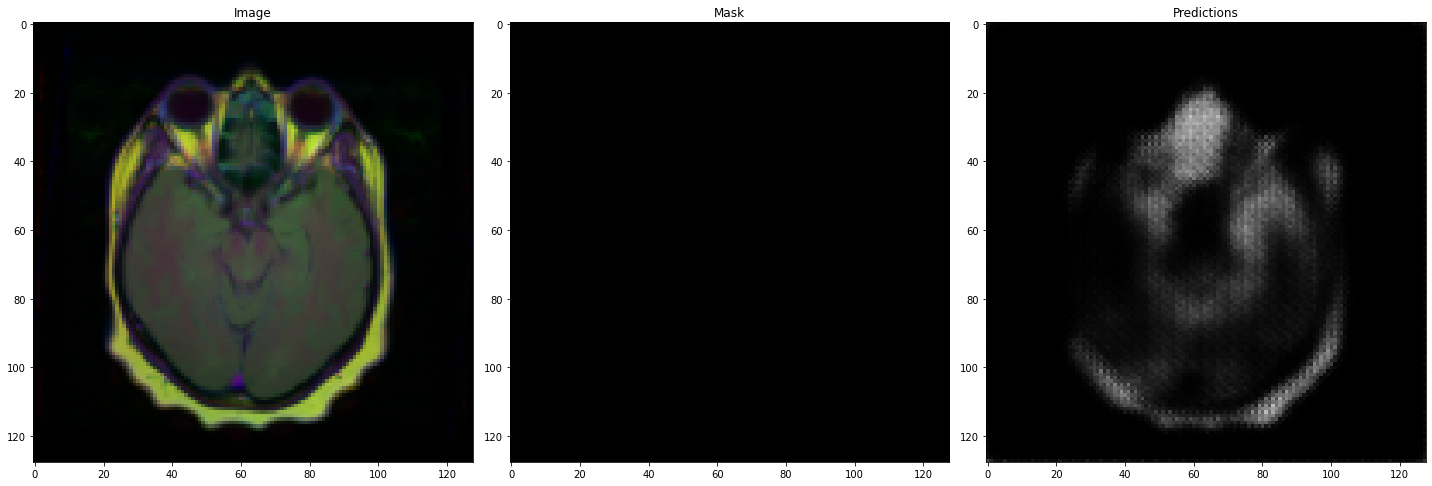

13


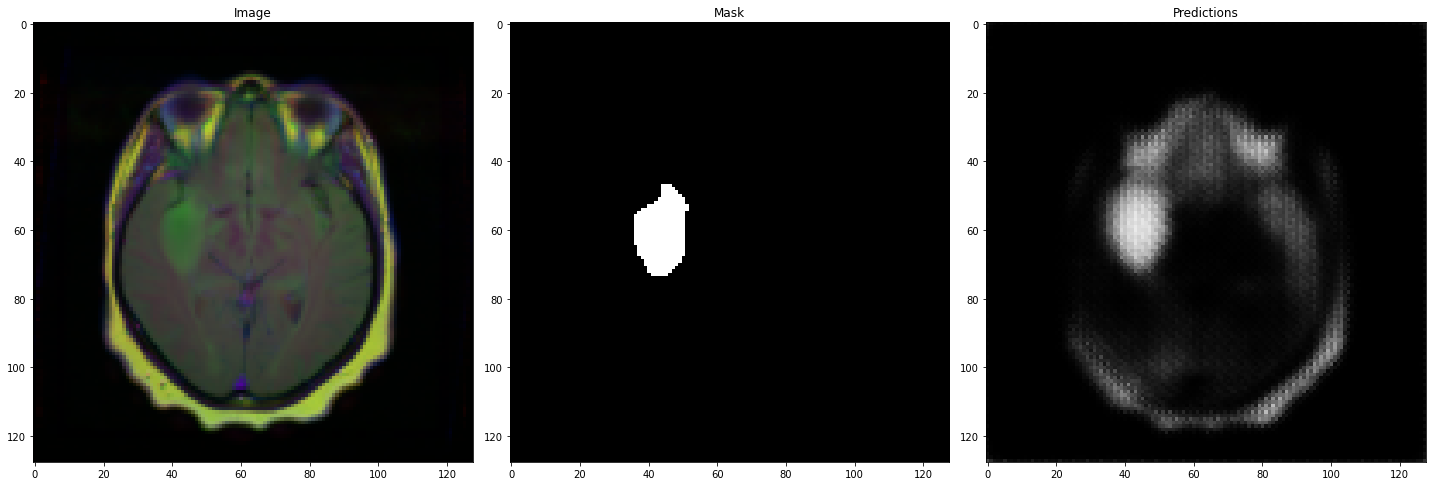

14


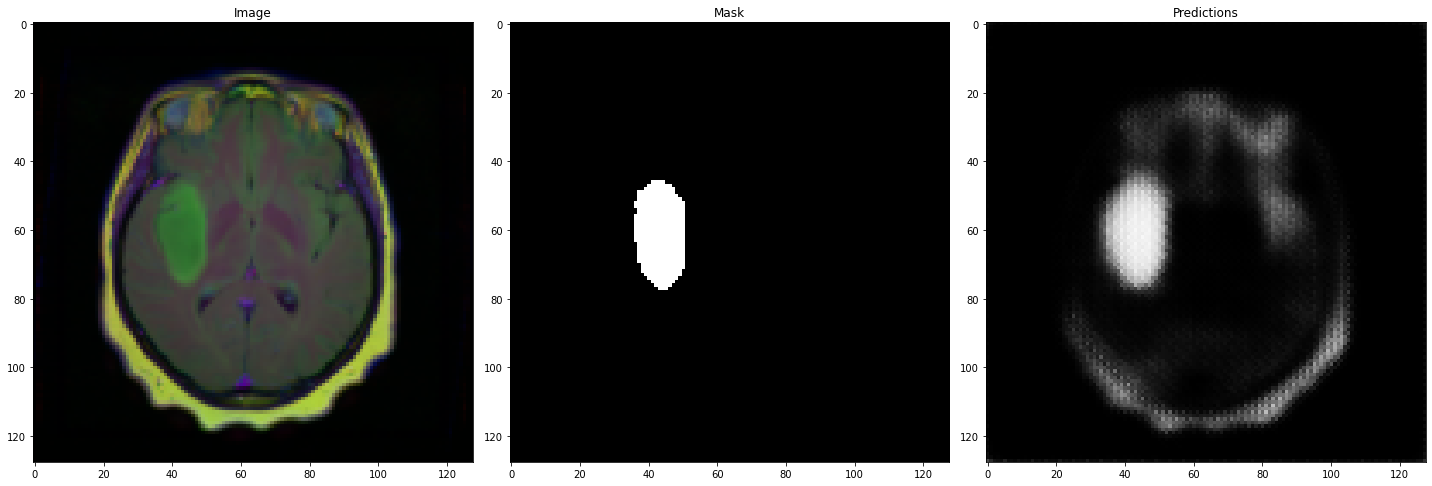

15


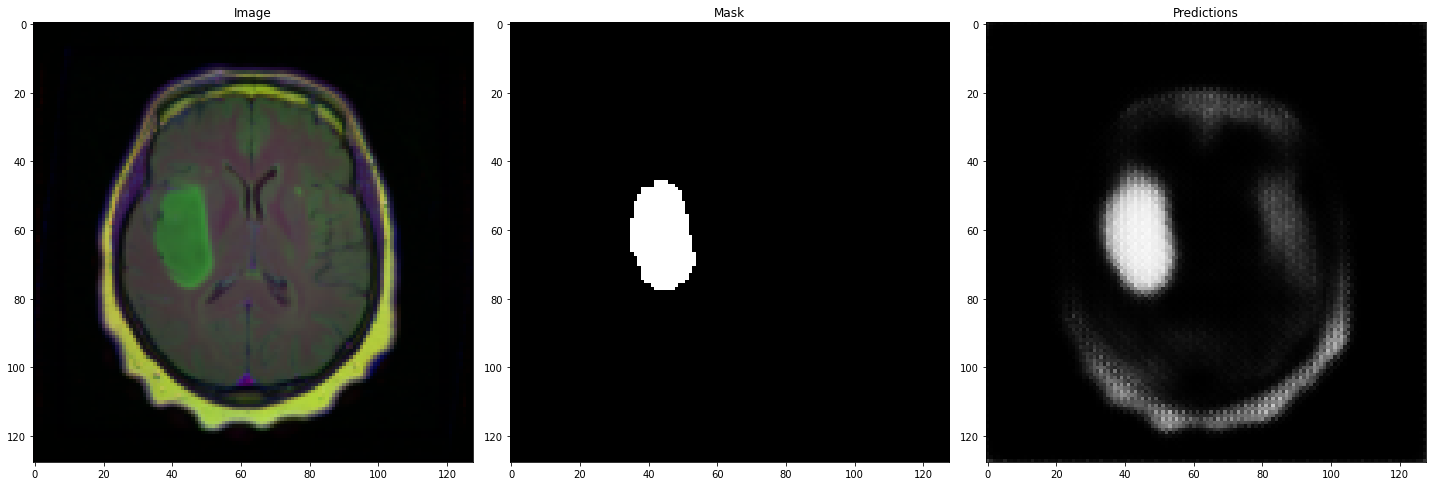

16


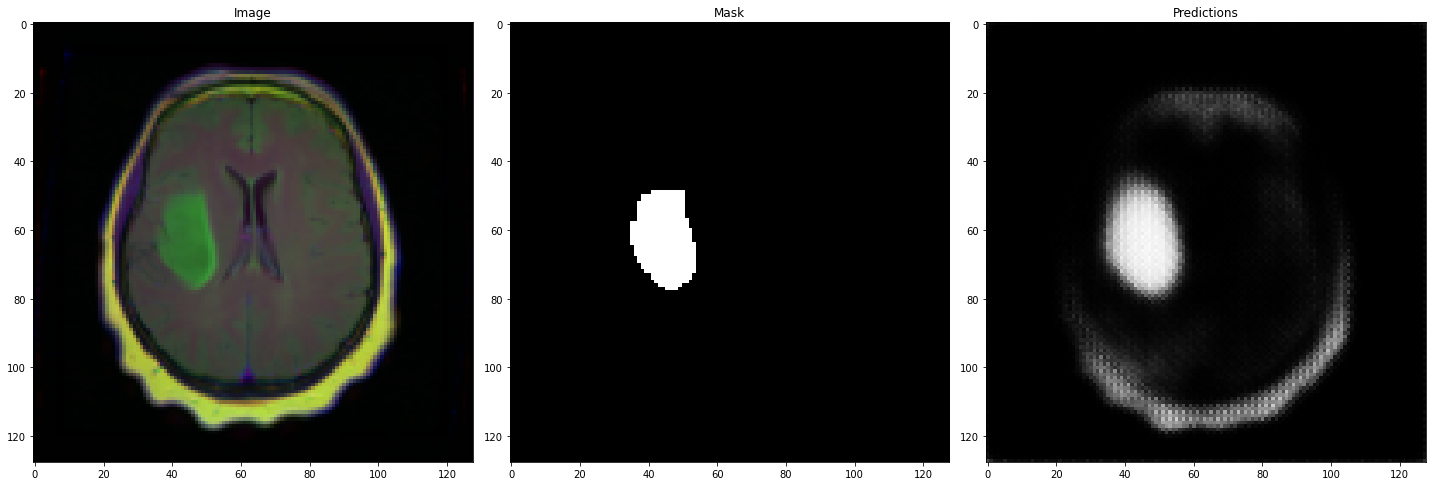

17


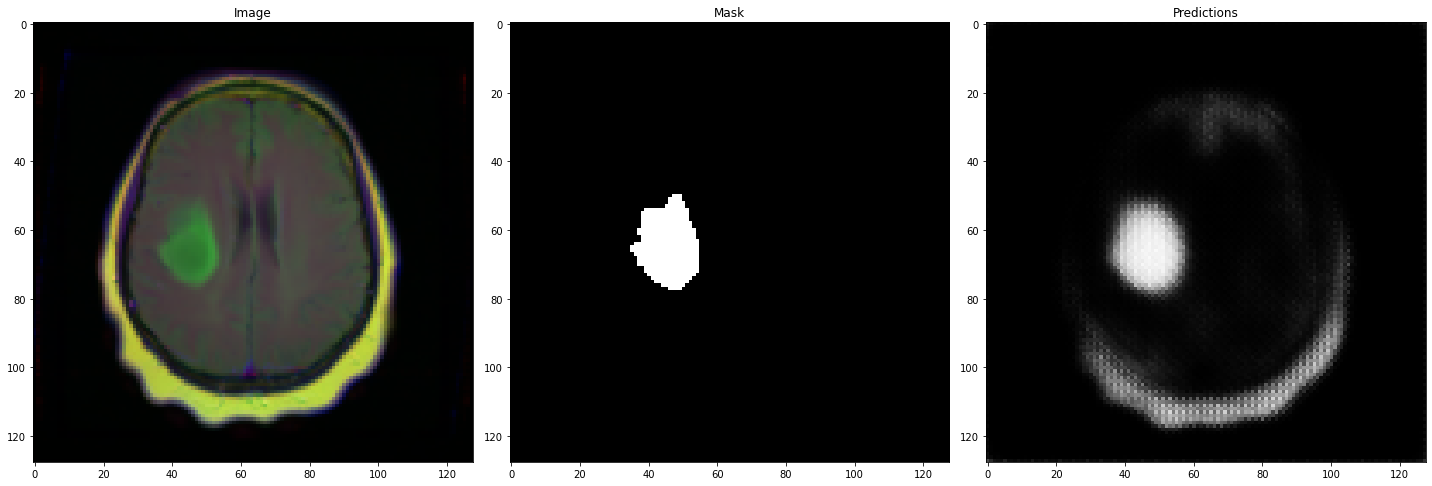

18


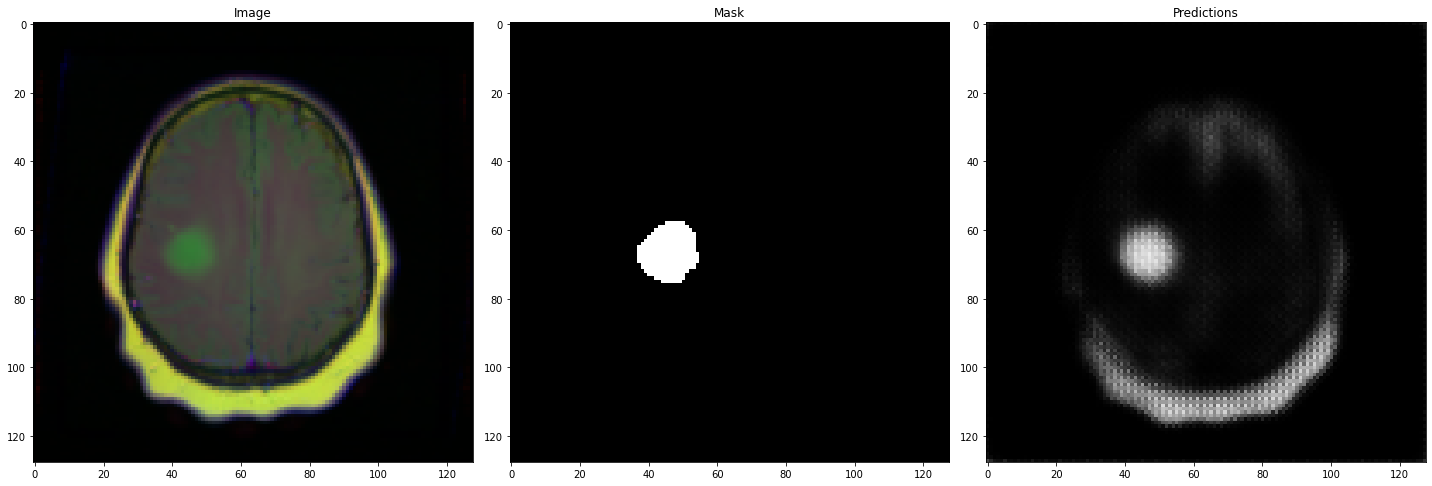

19


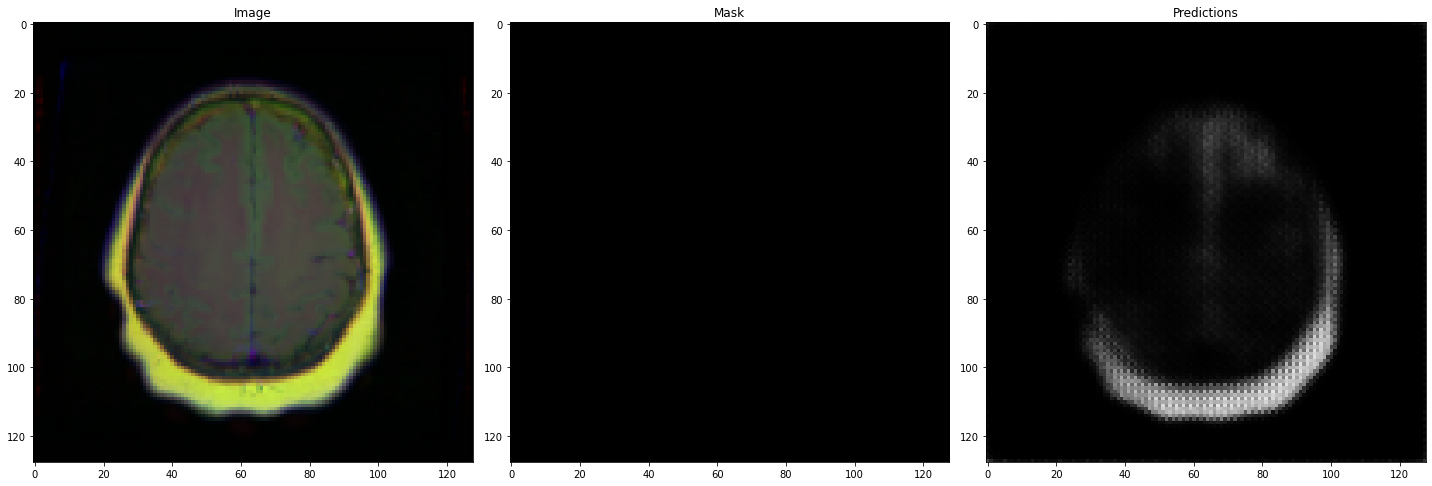

20


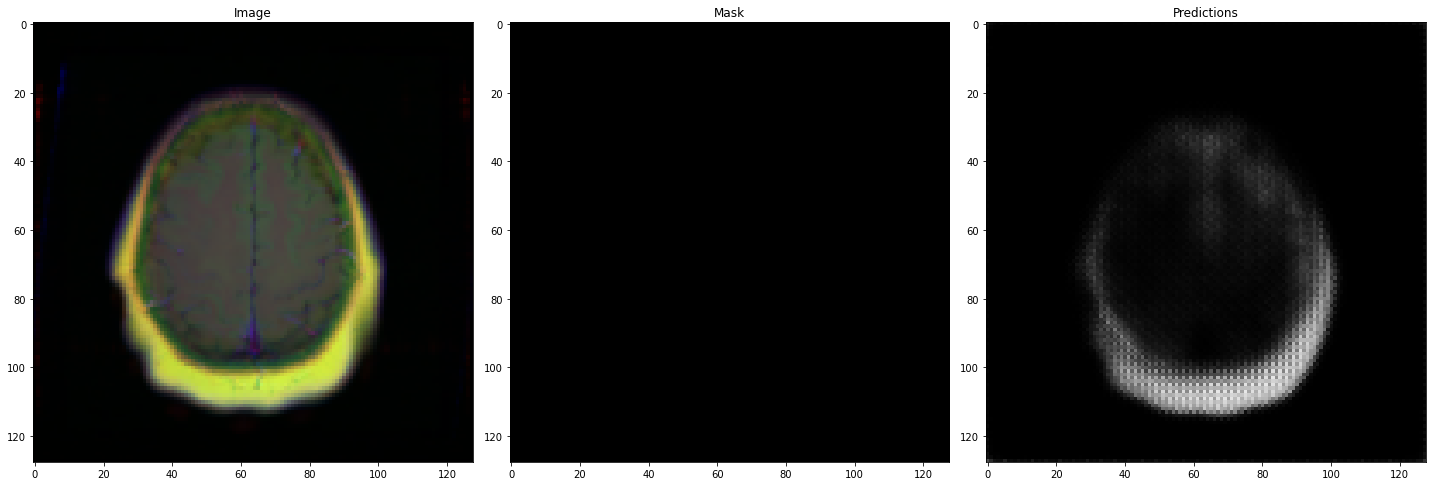

21


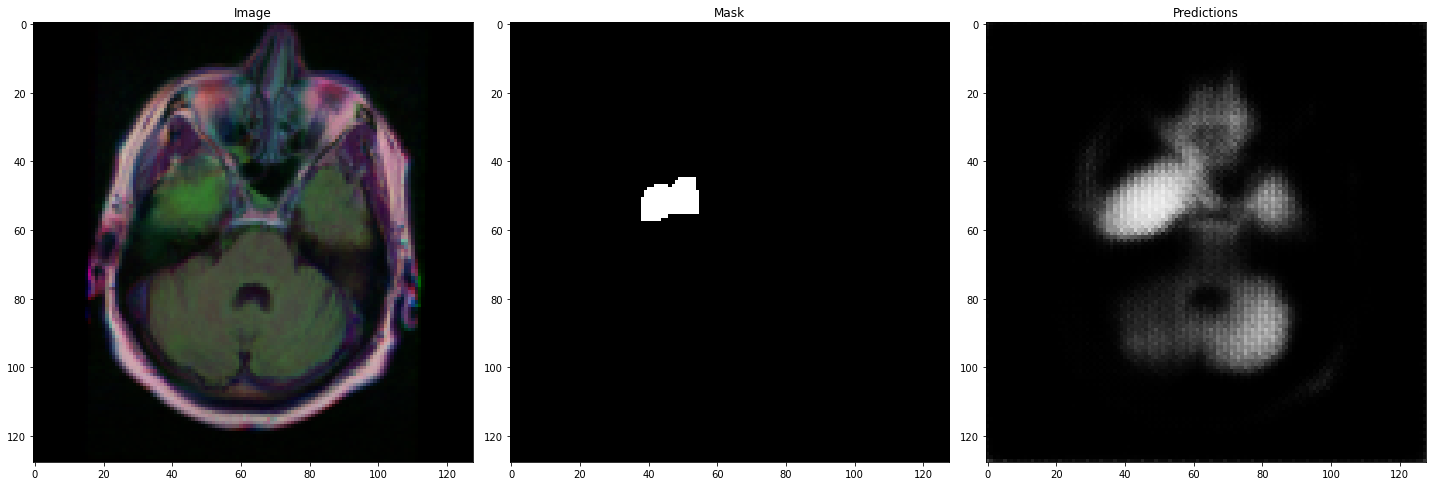

22


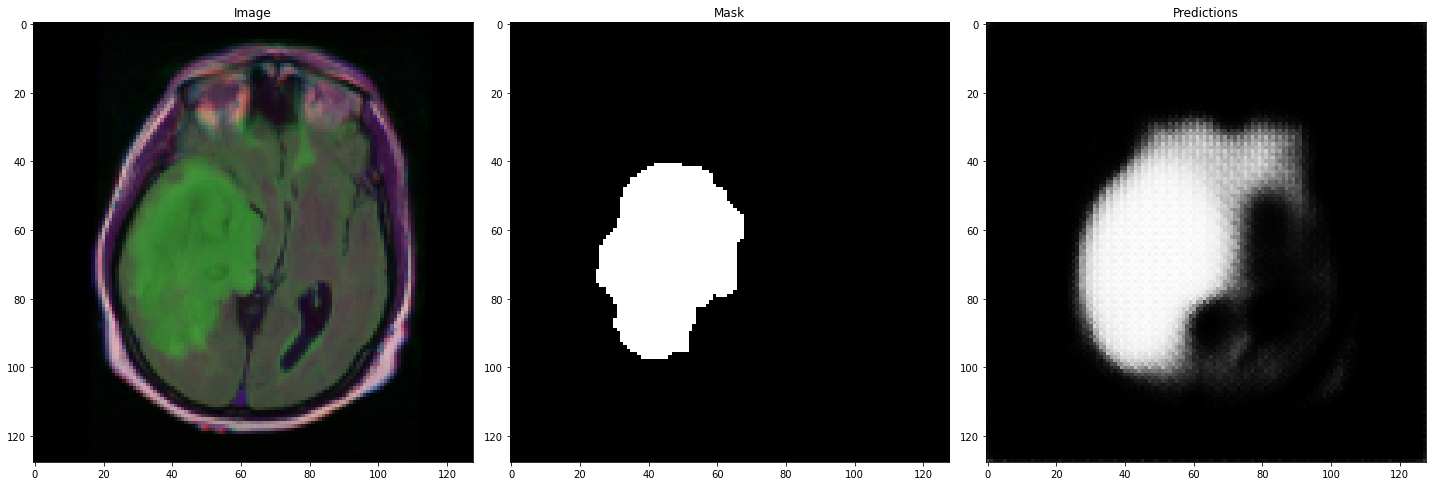

23


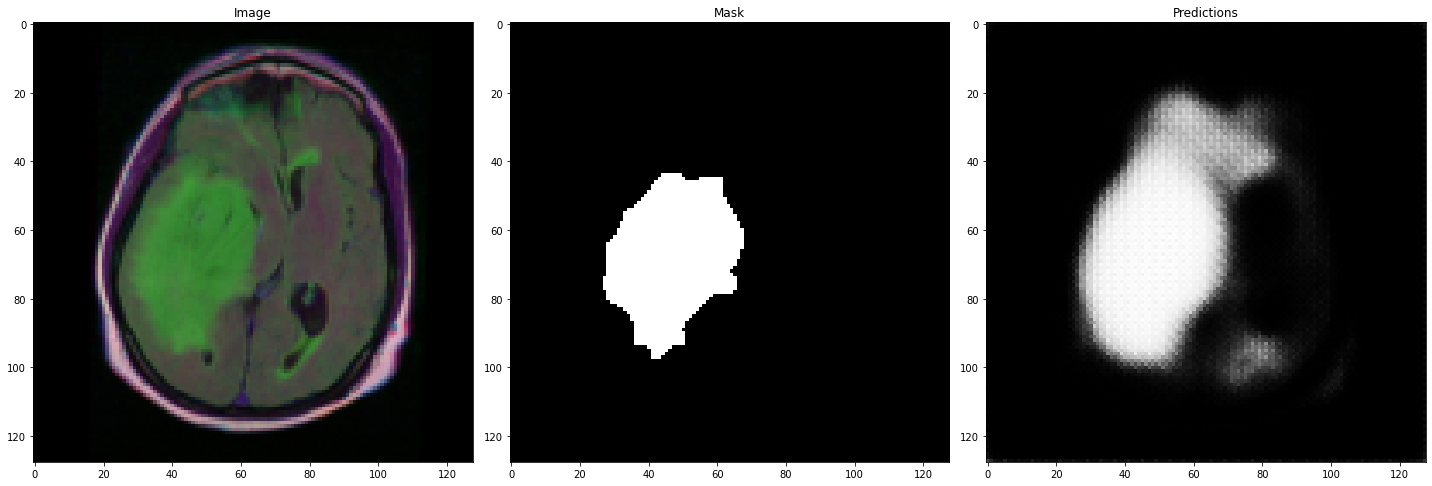

24


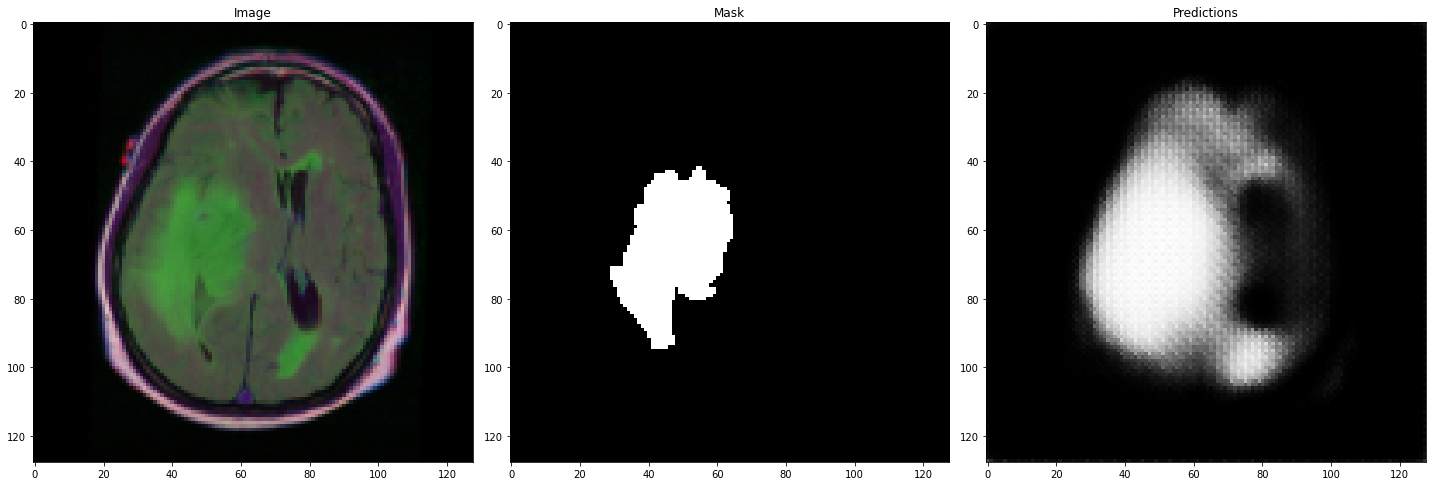

25


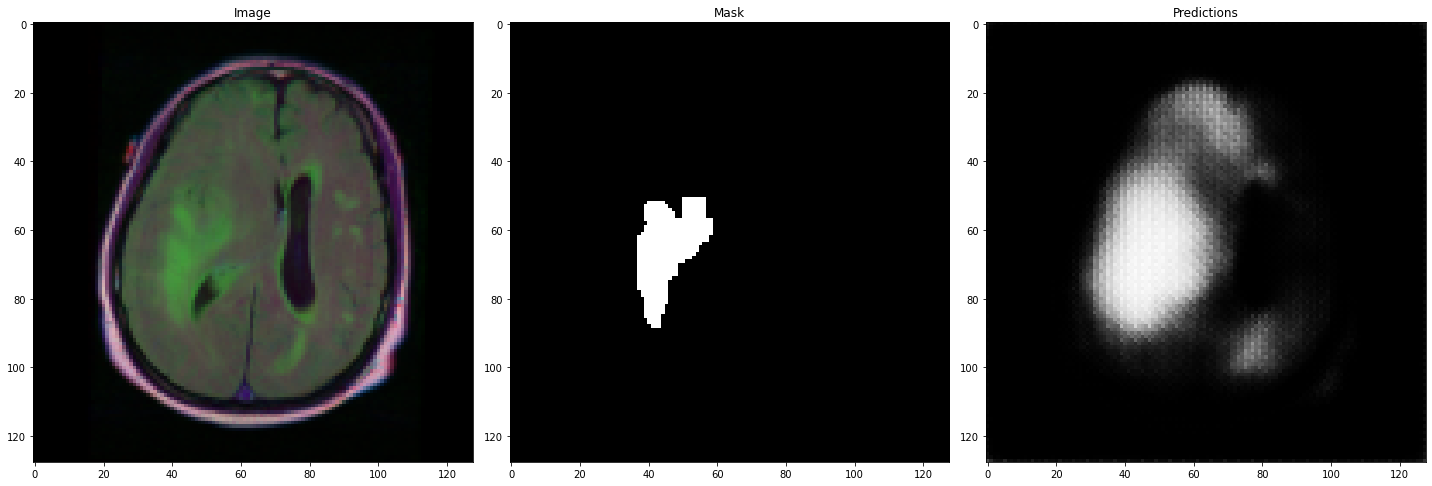

26


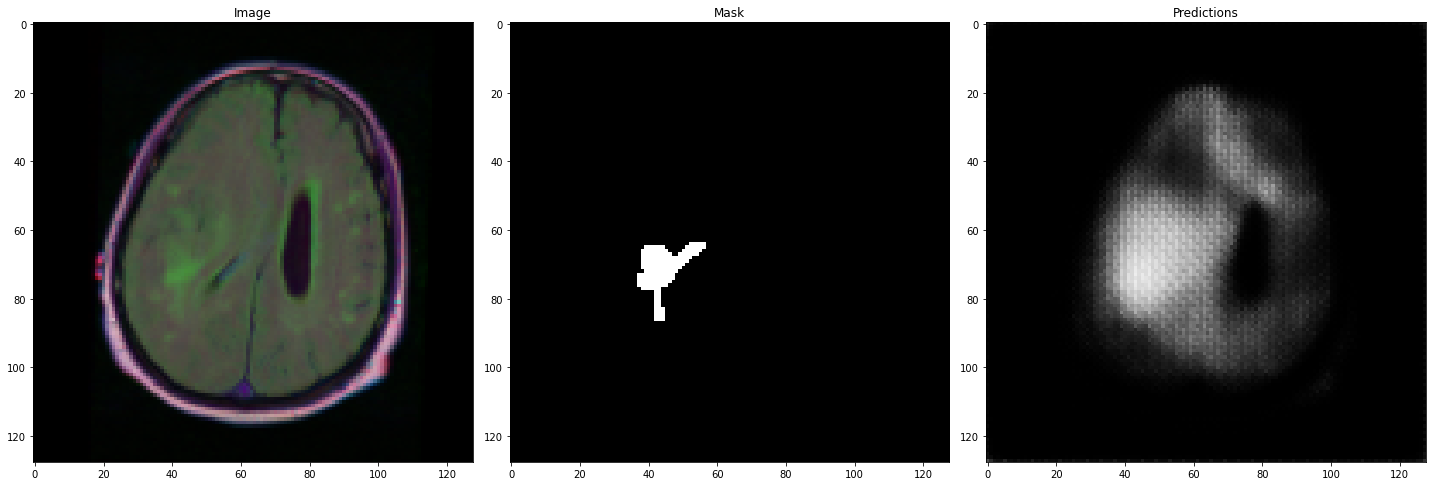

27


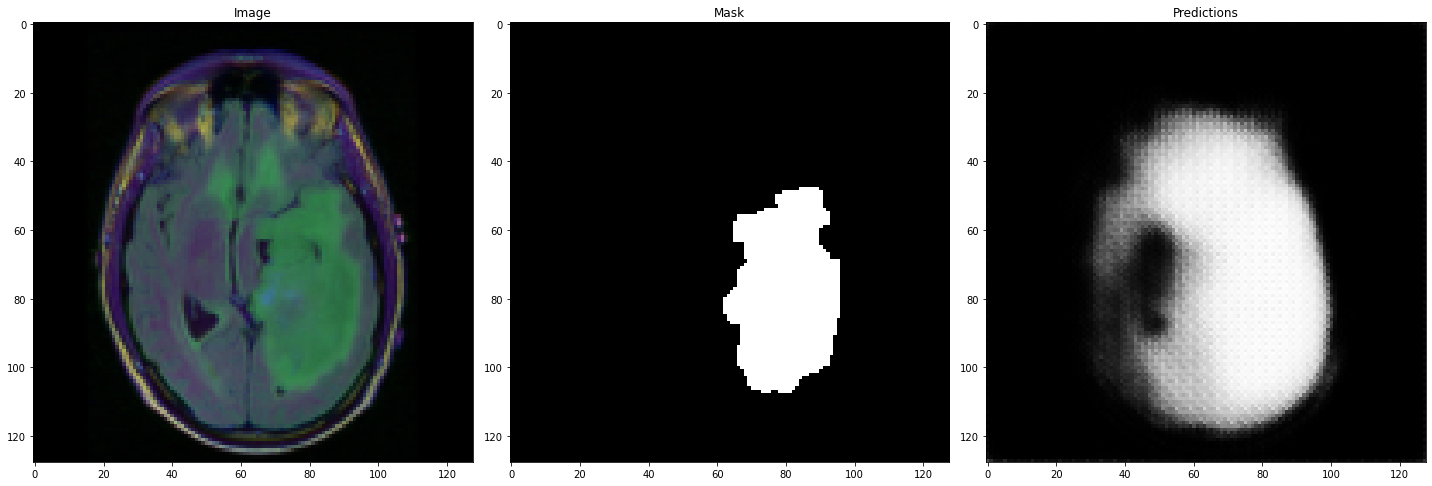

28


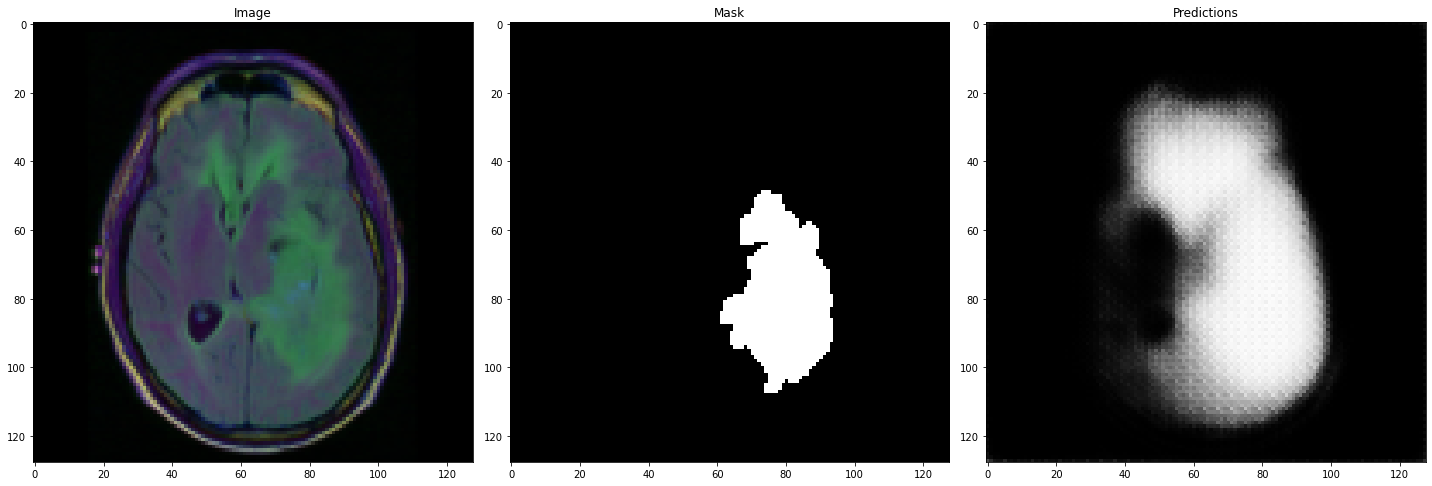

29


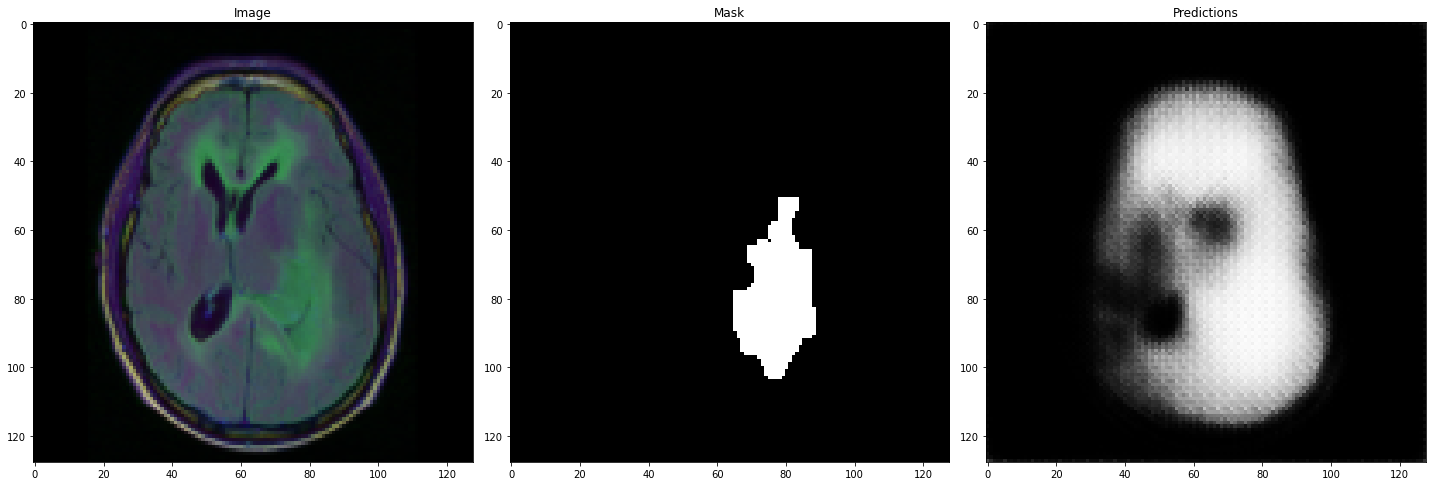

30


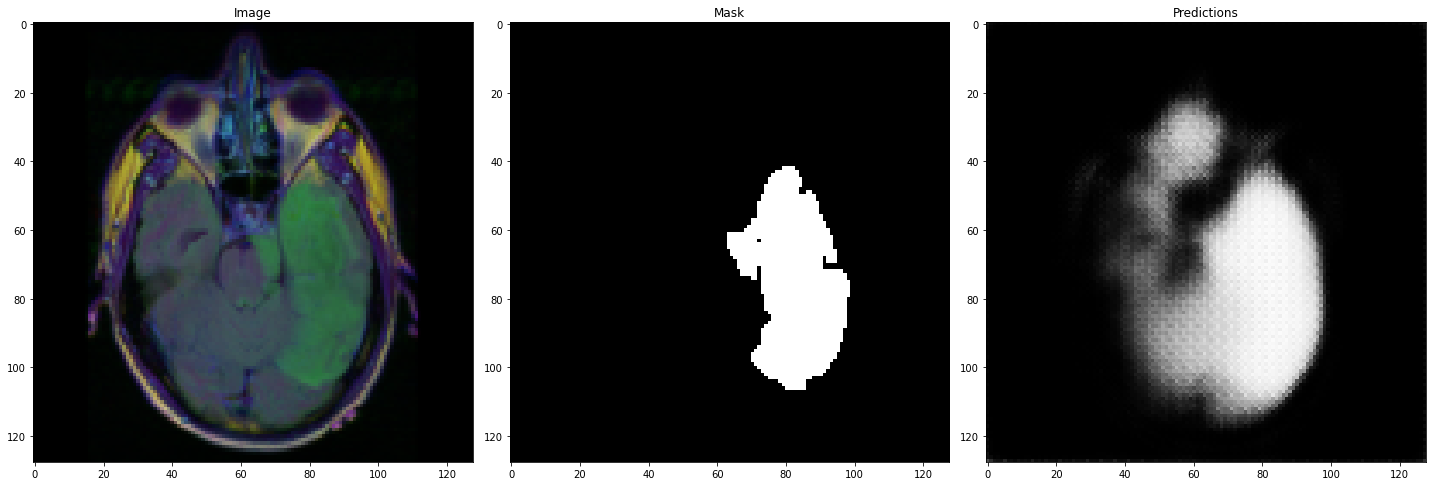

31


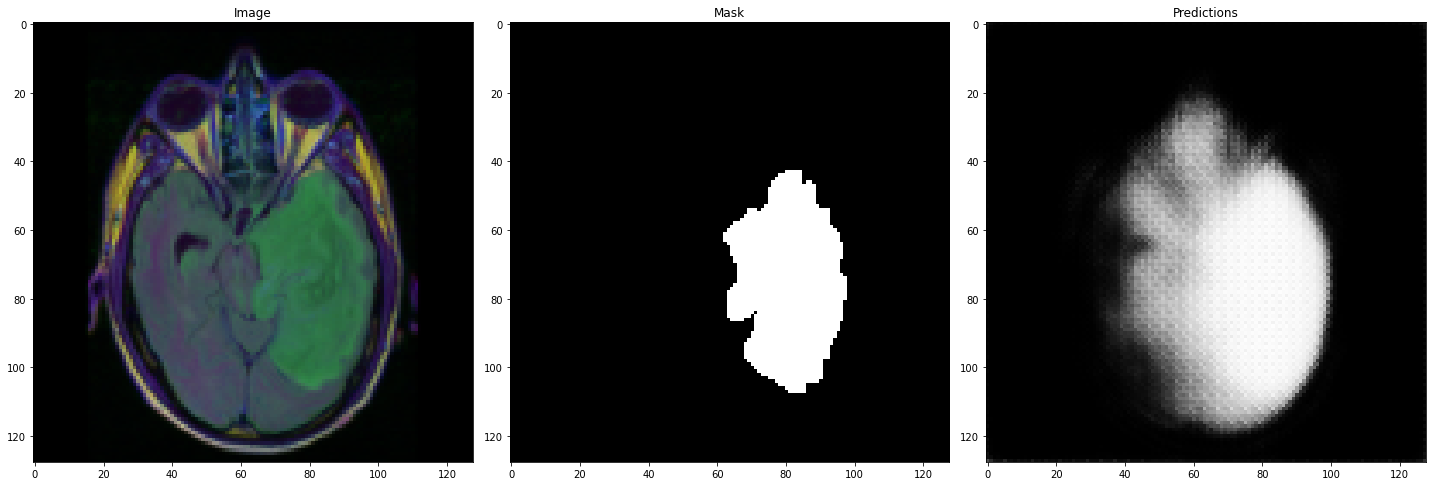

32


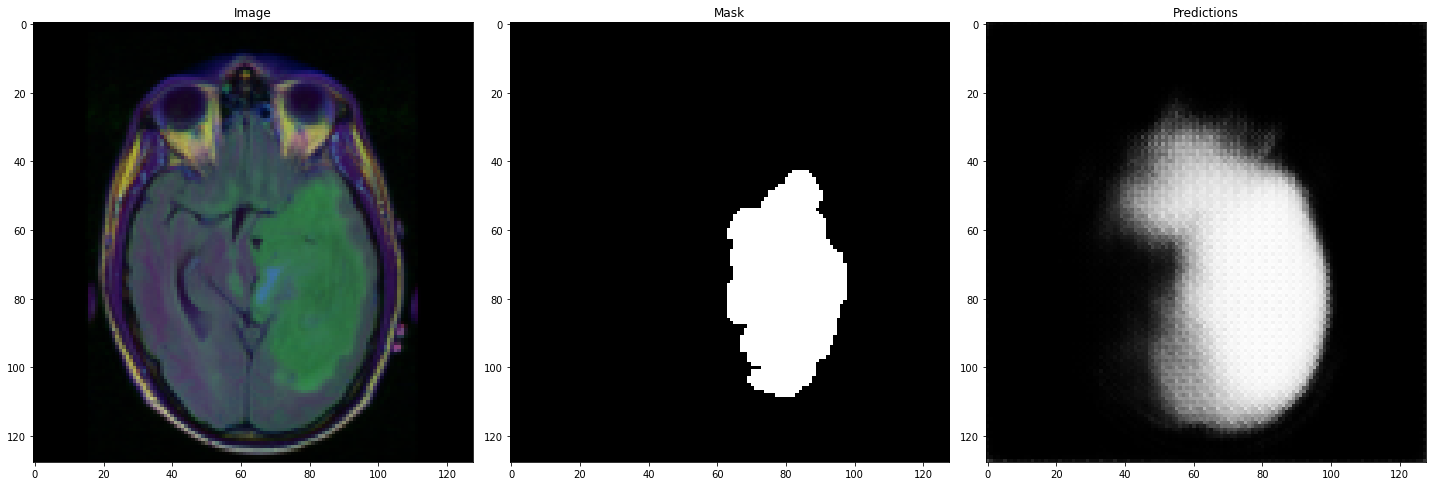

In [21]:
for i in range(len(imglst)):
    plt.figure(figsize=(20,20))

    # Our original training image
    plt.subplot(131)
    print(i)
    imshow(X_train[i])
    plt.title("Image")

    # Our original combined mask  
    plt.subplot(132)
    imshow(np.squeeze(Y_train[i]))
    plt.title("Mask")

    # The mask our U-Net model predicts
    plt.subplot(133)
    imshow(np.squeeze(pred_sample[i]))
    plt.title("Predictions")
    plt.show()